In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
# kNN
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier

In [259]:
df = pd.read_csv('D:\KPI Styding\DataAnalysis\car_prediction_data.csv') #зчитаємо CSV-файл з датасетом
df.head()
df=df.drop(['Car_Name','Present_Price','Owner',"Transmission"], axis=1) #видалимо непотрібні колонки
df.info()#виведемо інформацію проколонки
print('-------------------------------------------------------------')
print(df.head())#виведемо перших 5 рядків нашого датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.9+ KB
-------------------------------------------------------------
   Year  Selling_Price  Kms_Driven Fuel_Type Seller_Type
0  2014           3.35       27000    Petrol      Dealer
1  2013           4.75       43000    Diesel      Dealer
2  2017           7.25        6900    Petrol      Dealer
3  2011           2.85        5200    Petrol      Dealer
4  2014           4.60       42450    Diesel      Dealer


In [260]:
#перетворимо категоріальні значення стовпця Fuel_Type в числові
df["Fuel_Type"] = LabelEncoder().fit_transform(df["Fuel_Type"])
df.info()
print('-------------------------------------------------------------')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    int32  
 4   Seller_Type    301 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 10.7+ KB
-------------------------------------------------------------
   Year  Selling_Price  Kms_Driven  Fuel_Type Seller_Type
0  2014           3.35       27000          2      Dealer
1  2013           4.75       43000          1      Dealer
2  2017           7.25        6900          2      Dealer
3  2011           2.85        5200          2      Dealer
4  2014           4.60       42450          1      Dealer


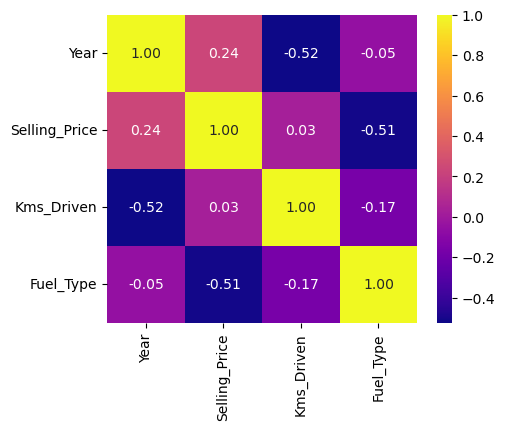

In [261]:
#відобразимо матрицю кореляцій ознак між собою
data=df.drop(['Seller_Type'], axis=1) #видалимо колонку типу продавця так як вона не є числовою
corr = data.corr() 
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr,  cmap='plasma', annot=True, fmt=".2f")
plt.show()

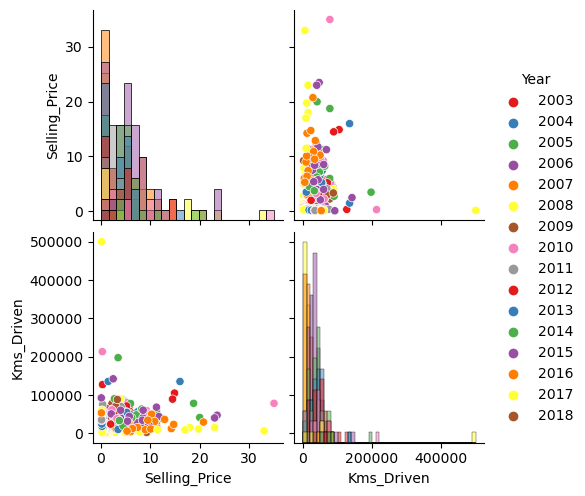

In [262]:
warnings.filterwarnings("ignore", category=UserWarning)
sns.pairplot(df[["Year", "Selling_Price", "Kms_Driven"]], hue="Year", diag_kind="hist", palette='Set1')
plt.show()

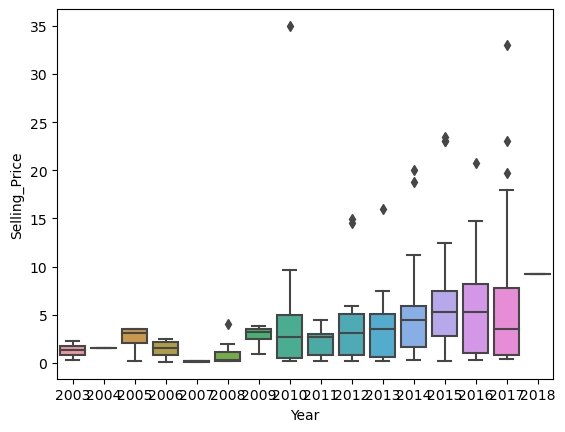

In [263]:
figure = plt.figure()
ax2 = sns.boxplot(x='Year', y='Selling_Price', data=df)
plt.show()

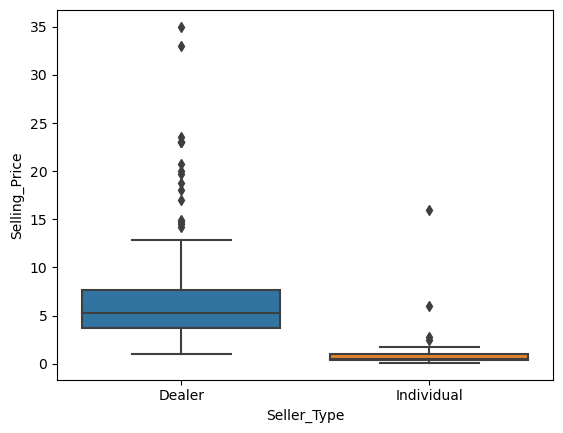

In [264]:
figure = plt.figure()
ax2 = sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.show()

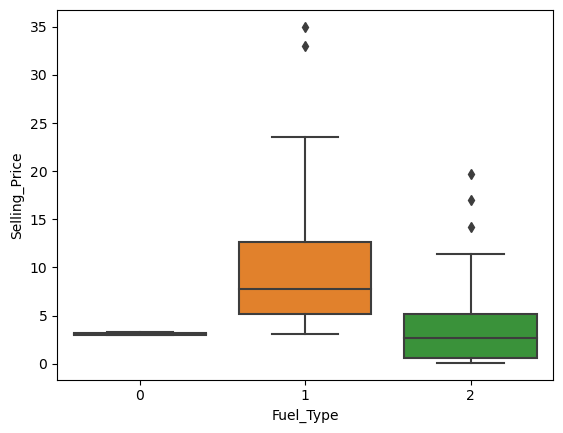

In [265]:
figure = plt.figure()
ax2 = sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.show()

In [266]:
#будемо прогнозувати вид продавця: диллер або власник
x = df.drop(["Seller_Type"], axis = 1)
y = df["Seller_Type"]
#розібємо на тестову та навчальну частини наш датасет
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


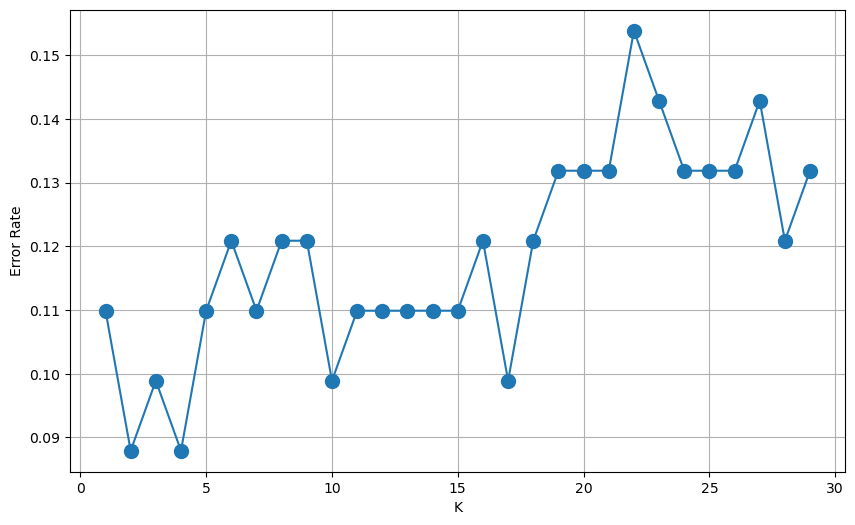

In [286]:
accuracies_list = dict() #словник для збереження результатів точності всіх піддослідних методів  

#виконаємо нормалізацію
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

error_rate = []
for i in range(1,30): #визначимо оптимальну кількість найближчих сусідів
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_x_train,y_train)
    pred_i = knn.predict(scaled_x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()


In [287]:
#Виконаємо Knn-класифікацію
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(scaled_x_train,y_train)
y_pred = knn.predict(scaled_x_test)
print(confusion_matrix(y_test,y_pred)) 
print('-------------------------------------------------------------')
print("Knn:\n",classification_report(y_test,y_pred))
accuracies_list["Knn"]= accuracy_score(y_test, y_pred)

[[57  4]
 [ 5 25]]
-------------------------------------------------------------
Knn:
               precision    recall  f1-score   support

      Dealer       0.92      0.93      0.93        61
  Individual       0.86      0.83      0.85        30

    accuracy                           0.90        91
   macro avg       0.89      0.88      0.89        91
weighted avg       0.90      0.90      0.90        91



In [288]:
#Виконаємо класифікацію за допомогою дерева рішень
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------------------------')
print("Decision Tree:\n",classification_report(y_test, y_pred))
accuracies_list["Decision Tree"]= accuracy_score(y_test, y_pred)

[[59  2]
 [ 0 30]]
-------------------------------------------------------------
Decision Tree:
               precision    recall  f1-score   support

      Dealer       1.00      0.97      0.98        61
  Individual       0.94      1.00      0.97        30

    accuracy                           0.98        91
   macro avg       0.97      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



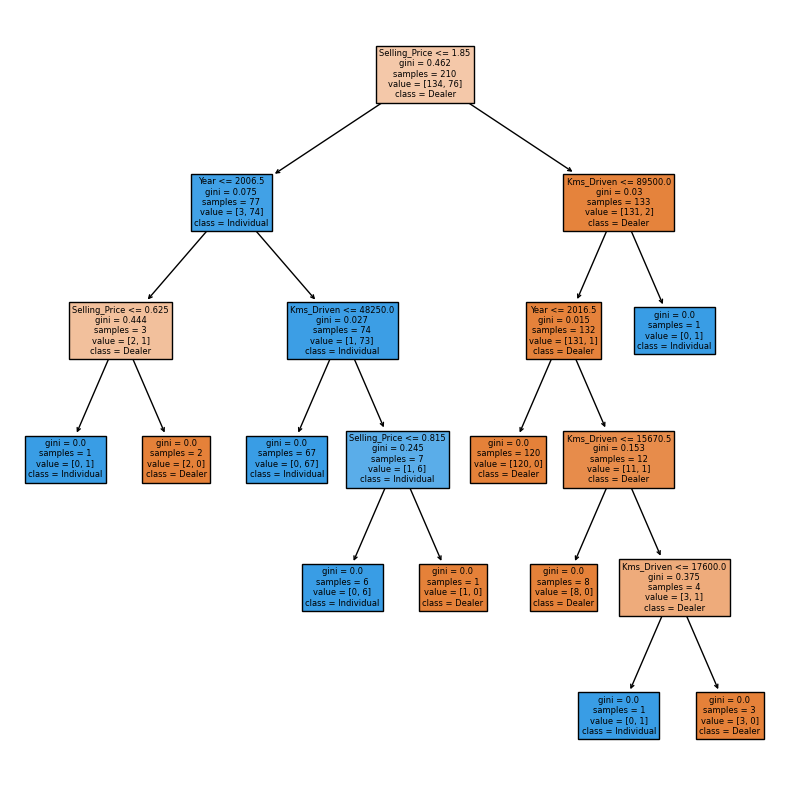

In [289]:
#візуалізуємо дані для алгоритму дерева рішень 
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = x.columns.tolist(),class_names=y.unique().tolist(), filled = True)
plt.show()

In [290]:
#Виконаємо класифікацію за допомогою методу опорних векторів
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(x_train, y_train)
print("Best params of C and gamma:", grid.best_estimator_) #виведемо найоптимальніші параметри моделі  
print('-------------------------------------------------------------')
y_pred = grid.predict(x_test)
print("Support Vector Machine:\n", confusion_matrix(y_test, y_pred))
print('-------------------------------------------------------------')
print(classification_report(y_test, grid_predictions))
accuracies_list["SVM"]= accuracy_score(y_test, y_pred)

Best params of C and gamma: SVC(C=10, gamma=0.1)
-------------------------------------------------------------
Support Vector Machine:
 [[60  1]
 [18 12]]
-------------------------------------------------------------
              precision    recall  f1-score   support

      Dealer       0.77      0.98      0.86        61
  Individual       0.92      0.40      0.56        30

    accuracy                           0.79        91
   macro avg       0.85      0.69      0.71        91
weighted avg       0.82      0.79      0.76        91



In [291]:
#використання Random Forest для класифікації
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------------------------')
print("Random Forest:\n", classification_report(y_test, y_pred))
accuracies_list["Random Forest"]= accuracy_score(y_test, y_pred)

[[61  0]
 [ 2 28]]
-------------------------------------------------------------
Random Forest:
               precision    recall  f1-score   support

      Dealer       0.97      1.00      0.98        61
  Individual       1.00      0.93      0.97        30

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.97        91
weighted avg       0.98      0.98      0.98        91



In [292]:
#використання AdaBoost для класифікації
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(x_train, y_train)
y_pred = adaboost_classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------------------------')
print("Adaptive Boosting:\n", classification_report(y_test, y_pred))
accuracies_list["Adaptive Boosting"]= accuracy_score(y_test, y_pred)

[[61  0]
 [ 2 28]]
-------------------------------------------------------------
Adaptive Boosting:
               precision    recall  f1-score   support

      Dealer       0.97      1.00      0.98        61
  Individual       1.00      0.93      0.97        30

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.97        91
weighted avg       0.98      0.98      0.98        91



In [298]:
max_accuracies = max(accuracies_list, key=accuracies_list.get)
print("Method with maximum accuracies:", max_accuracies)
print("Maximum accuracies:",accuracies_list[max_accuracies])

Method with maximum accuracies: Decision Tree
Maximum accuracies: 0.978021978021978


In [ ]:
max_value = max(my_dict, key=my_dict.get)